# Laboratorio de regresión lineal

|                |   |
:----------------|---|
| **Nombre**        Jose Manuel Orozco Martinez  |
| **Fecha**      | 24/09/2024   |
| **Expediente*  | 750649|    |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [3]:
import pandas as pd 

datos= pd.read_csv("Advertising.csv")
datos 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

#### Respuesta:

Los resultados nos dicen  que el presupuesto destinado a la publicidad en TV tiene una relación más fuerte con las ventas, mientras que la inversión en periódicos podría no estar contribuyendo tanto.

Si se determinara una falta de relación significativa entre la publicidad y las ventas (especialmente para  los periódicos), podrías reconsiderar o redistribuir el presupuesto publicitario para maximizar el impacto en las ventas.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

El análisis de regresión muestra que la inversión en publicidad tiene un impacto significativo en las ventas:

TV: Por cada unidad adicional invertida en TV, las ventas aumentan en promedio 0.0458 unidades, lo que indica una relación fuerte entre el gasto en publicidad televisiva y el aumento en las ventas.
Radio: Cada unidad adicional de inversión en radio incrementa las ventas en 0.1885 unidades, lo que también representa un impacto significativo, aunque un poco menor que en TV.
Periódico: No tiene un impacto significativo en las ventas, ya que el coeficiente es cercano a cero, lo que sugiere que invertir en publicidad en periódicos no está relacionado con un aumento en las ventas.

#### ¿Nos sirve conocer el impacto?
Sí, es muy útil. Al conocer el impacto de cada medio publicitario en las ventas, puedes tomar decisiones más informadas sobre cómo distribuir el presupuesto de publicidad para maximizar su efectividad

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [42]:
import numpy as np
from scipy.optimize import minimize

X = np. array (datos["TV" ]) 
Y = np. array (datos["sales"])

def rss (params, X, Y):
    beta_0, beta_1 = params
    
    Y_pred = beta_0 + beta_1 * X
    
    residuo = Y - Y_pred
    return np.sum(residuo**2)
    
initial_params = [0, 0]

result = minimize(rss, initial_params, args= (X, Y))

beta_0_est, beta_1_est = result.x

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [18]:
xm = np.mean(x)
ym = np.mean(y)

# Cálculo de la pendiente (B1) y la intersección (B0)
B1 = np.sum((x - xm) * (y - ym)) / np.sum((x - xm)**2)
B0 = ym - B1 * xm
B1

0.047536640433019736

In [9]:
B0-ym-B1*xm
B0

7.0325935491276965

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

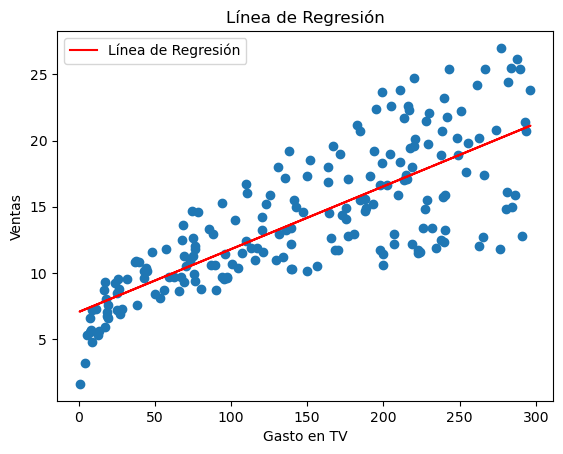

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Datos para la regresión
x = datos["TV"]
y = datos["sales"]

# Predicción de la línea de regresión
y_prediccion = B1 * x + B0

# Gráfica
plt.figure()
plt.plot(x, y_prediccion, color="red", label='Línea de Regresión')  
plt.scatter(x, y)  
plt.title('Línea de Regresión')
plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()


In [38]:
import numpy as np
n=len(y)
ones = np.ones([n, 1])
tv_factor = np.reshape(x, [n, 1])
X = np.hstack([ones, tv_factor])

y_vector = np.reshape(y, [n, 1])
n, p= X.shape
beta = np.random.rand(p)

def funcion(beta, X,y) : 
    # y: valor verdadero medido 
    # beta: coeficientes de los factores 
    # X: factores
    n, p = X.shape
    beta = np.reshape(beta, [p, 1])

    y_prediccion = X @ beta 
    error = y_prediccion - y 
    rss = error.T @ error 
    return rss[0,0]
import scipy.optimize as opt 
B=opt.minimize(funcion, beta, args=(X,y_vector))
B

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2102.5305831327337
        x: [ 7.033e+00  4.754e-02]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 9.870e-03 -5.012e-05]
            [-5.012e-05  3.409e-07]]
     nfev: 27
     njev: 9

### 

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

* Población: Es el conjunto total de elementos o individuos que comparten ciertas características y son objeto de análisis. Por ejemplo, todos los estudiantes de una universidad.



* Muestra: Es un subconjunto de la población, seleccionado para realizar estudios. Debe ser representativa para que las conclusiones sean precisas.

* La población proporciona el contexto completo para el análisis, mientras que la muestra lleva a cabo estudios prácticos y hacer inferencias sobre la población.








¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

* La precisión de estimaciones es mayor al trabajar con la población, ya que los resultados son precisos y confiables.

* mientras que al usar una muestra, los resultados son menos precisos debido al error muestral. En términos de varianza y error, la población no presenta variabilidad por muestreo, minimizando el error, mientras que en una muestra puede haber un mayor error de estimación y más variabilidad

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [26]:
import numpy as np

# Asumiendo los coeficientes obtenidos anteriormente
B1 = 0.047536640433019736
B0 = 7.0325935491276965

# Datos (asumiendo que los datos ya están cargados en el DataFrame 'datos')
x = datos["TV"]
y = datos["sales"]


xm = np.mean(x)
ym = np.mean(y)
y_pred = B0 + B1 * x


residual = y - y_pred
s = np.sqrt(np.sum(residuals**2) / (len(x) - 2))

#B1
SE_B1 = s / np.sqrt(np.sum((x - xm)**2))
#B0
SE_B0 = s * np.sqrt((1/len(x)) + (xm**2 / np.sum((x - xm)**2)))



SE_B0,SE_B1

(0.45784294027347855, 0.0026906071877968703)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

* La hipótesis nula es una afirmación que establece que no hay efecto, relación o diferencia significativa entre las variables que se están estudiando.
* Ejemplo:
Si un investigador está probando un nuevo tratamiento para una enfermedad, la hipótesis nula podría ser que "el nuevo tratamiento no tiene ningún efecto en la tasa de recuperación de los pacientes comparado con un placebo". En este caso, el investigador parte de la premisa de que el tratamiento no es efectivo.

* La hipótesis alternativa es la afirmación opuesta a la hipótesis nula. Sugiere que sí hay un efecto, una relación o una diferencia significativa entre las variables en estudio. Esta hipótesis se busca respaldar a través de la recolección y análisis de datos.
* Ejemplo:
Siguiendo con el mismo contexto del tratamiento, la hipótesis alternativa podría ser que "el nuevo tratamiento tiene un efecto positivo en la tasa de recuperación de los pacientes comparado con un placebo". Aquí, el investigador está buscando evidencia que apoye que el tratamiento es efectivo.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

¿Se rechaza la hipótesis nula? ¿Qué significa?

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

Calcula el RSS y RSE.

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

Calcula los estadísticos t y *p-values* de tus estimaciones.

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3